In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_150bp = pd.read_csv("../summary_data/original/all_tools_TRB_diversity.csv")
df_150bp = df_150bp[['Sample','tool','absolute_error','class']]
df_150bp = df_150bp[df_150bp.tool != '0']
df_150bp['read_length'] = '150bp'

In [3]:
df_75bp = pd.read_csv("../summary_data/75bp/all_tools_TRB_diversity.csv")
df_75bp = df_75bp[['Sample','tool','absolute_error','class']]
df_75bp = df_75bp[df_75bp.tool != '0']
df_75bp['read_length'] = '75bp'

In [4]:
df_50bp = pd.read_csv("../summary_data/50bp/all_tools_TRB_diversity.csv")
df_50bp = df_50bp[['Sample','tool','absolute_error','class']]
df_50bp = df_50bp[df_50bp.tool != '0']
df_50bp['read_length'] = '50bp'

In [5]:
diversity_combined = pd.concat([df_150bp,df_75bp,df_50bp])
diversity_combined

,Sample,tool,absolute_error,class,read_length
0,SRR5233637,MIXCR,4.650803,T_cell_poor_polyclonal,150bp
1,SRR5233637,IMREP,3.150218,T_cell_poor_polyclonal,150bp
2,SRR5233637,TRUST4,3.402869,T_cell_poor_polyclonal,150bp
3,SRR5233639,MIXCR,4.580975,T_cell_rich_polyclonal,150bp
4,SRR5233639,IMREP,2.510478,T_cell_rich_polyclonal,150bp
...,...,...,...,...,...
27,sample14,MIXCR,1.478044,T_cell_poor_polyclonal,50bp
28,sample14,TRUST4,0.002487,T_cell_poor_polyclonal,50bp
29,sample15,MIXCR,5.179507,T_cell_poor_polyclonal,50bp
30,sample15,TRUST4,6.941821,T_cell_poor_polyclonal,50bp


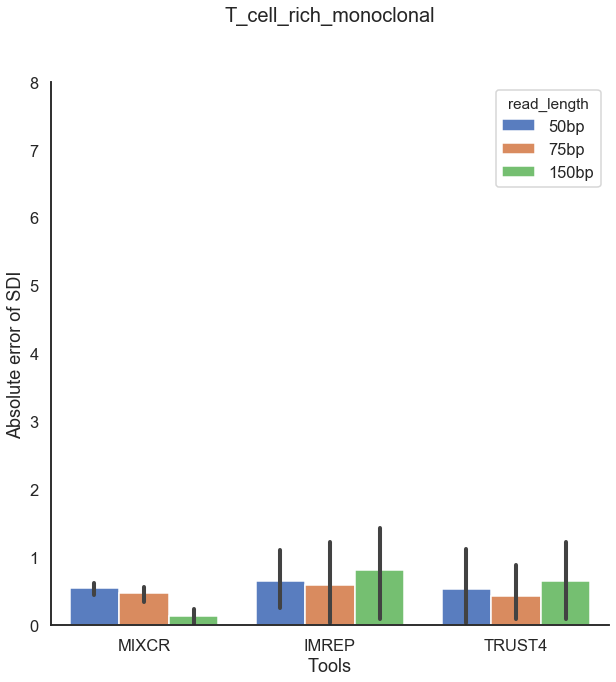

In [6]:
sns.set_style('white')
sns.set_context('talk')

figure = diversity_combined.loc[diversity_combined['class'] == 'T_cell_rich_monoclonal']
    
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(data=figure, x="tool", y="absolute_error", hue="read_length",palette="muted",
                 hue_order=["50bp","75bp","150bp"])
ax.set(ylim=(0,8))
ax.set_xlabel('Tools')
ax.set_ylabel('Absolute error of SDI')
plt.title('T_cell_rich_monoclonal',y=1.1,fontsize=20)
sns.despine()

plt.savefig("../figures/supplementary/figureS5_c1.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS5_c1.png",bbox_inches="tight")

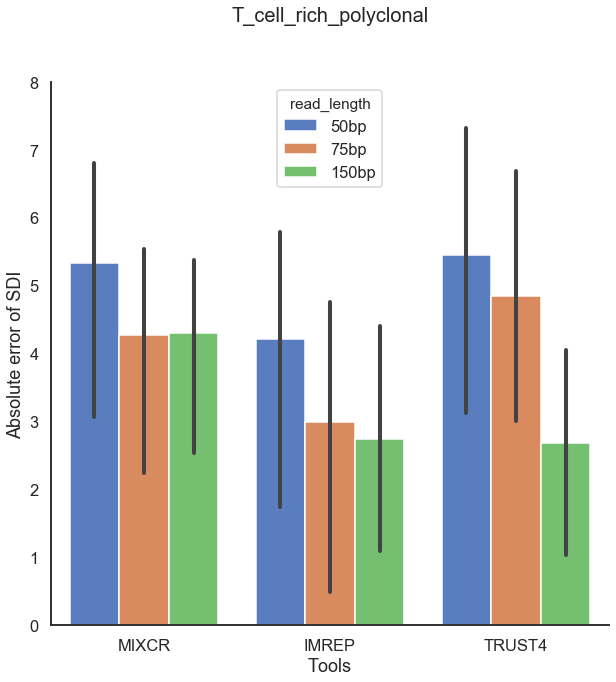

In [7]:
sns.set_style('white')
sns.set_context('talk')

figure = diversity_combined.loc[diversity_combined['class'] == 'T_cell_rich_polyclonal']
    
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(data=figure, x="tool", y="absolute_error", hue="read_length",palette="muted",
                 hue_order=["50bp","75bp","150bp"])
ax.set(ylim=(0,8))
ax.set_xlabel('Tools')
ax.set_ylabel('Absolute error of SDI')
plt.title('T_cell_rich_polyclonal',y=1.1,fontsize=20)
sns.despine()

plt.savefig("../figures/supplementary/figureS5_c2.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS5_c2.png",bbox_inches="tight")

In [8]:
mean_diversity_combined = diversity_combined.groupby(["tool","read_length","class"])["absolute_error"].mean().reset_index()
mean_diversity_combined['read_length'] = pd.Categorical(mean_diversity_combined['read_length'],categories=['50bp','75bp','150bp'],ordered=True)
mean_diversity_combined = mean_diversity_combined.sort_values('read_length',ascending=False)
mean_diversity_combined

,tool,read_length,class,absolute_error
0,IMREP,150bp,T_cell_poor_polyclonal,4.012572
2,IMREP,150bp,T_cell_rich_polyclonal,2.744656
20,TRUST4,150bp,T_cell_rich_polyclonal,2.686848
19,TRUST4,150bp,T_cell_rich_monoclonal,0.653830
18,TRUST4,150bp,T_cell_poor_polyclonal,3.486723
9,MIXCR,150bp,T_cell_poor_polyclonal,4.508950
10,MIXCR,150bp,T_cell_rich_monoclonal,0.141408
11,MIXCR,150bp,T_cell_rich_polyclonal,4.296145
1,IMREP,150bp,T_cell_rich_monoclonal,0.814811
15,MIXCR,75bp,T_cell_poor_polyclonal,5.239331


In [9]:
mean_repertoire_absolute_error = mean_diversity_combined.groupby(["class","read_length"])["absolute_error"].agg(["mean", "std"])
display(mean_repertoire_absolute_error)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools:  
    print(tool)
    df_tool = mean_diversity_combined.loc[mean_diversity_combined['tool'] == tool]
    mean_repertoire_absolute_error = df_tool.groupby(["class","read_length"])["absolute_error"].agg(["mean"]) 
    display(mean_repertoire_absolute_error)

mean       std
class                  read_length                    
T_cell_poor_polyclonal 50bp         6.095739  0.716738
                       75bp         5.391085  0.590443
                       150bp        4.002749  0.511184
T_cell_rich_monoclonal 50bp         0.576798  0.061432
                       75bp         0.497589  0.091209
                       150bp        0.536683  0.351654
T_cell_rich_polyclonal 50bp         4.998403  0.687718
                       75bp         4.033923  0.953964
                       150bp        3.242550  0.912898

MIXCR


mean
class                  read_length          
T_cell_poor_polyclonal 50bp         5.468398
                       75bp         5.239331
                       150bp        4.508950
T_cell_rich_monoclonal 50bp         0.543497
                       75bp         0.468376
                       150bp        0.141408
T_cell_rich_polyclonal 50bp         5.331406
                       75bp         4.268501
                       150bp        4.296145

IMREP


mean
class                  read_length          
T_cell_poor_polyclonal 50bp         6.876897
                       75bp         4.891331
                       150bp        4.012572
T_cell_rich_monoclonal 50bp         0.647690
                       75bp         0.599826
                       150bp        0.814811
T_cell_rich_polyclonal 50bp         4.207571
                       75bp         2.984552
                       150bp        2.744656

TRUST4


mean
class                  read_length          
T_cell_poor_polyclonal 50bp         5.941921
                       75bp         6.042593
                       150bp        3.486723
T_cell_rich_monoclonal 50bp         0.539206
                       75bp         0.424566
                       150bp        0.653830
T_cell_rich_polyclonal 50bp         5.456231
                       75bp         4.848716
                       150bp        2.686848